In [1]:
#Exploratory Data Analysis of Sample superstore data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#examining the dataset

In [3]:
sample_store=pd.read_csv('SampleSuperstore.csv')
sample_store.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
sample_store.shape

(9994, 13)

In [5]:
print(sample_store.columns)

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')


In [6]:
sample_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
sample_store.describe()


,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
sample_store['Profit'].quantile(0.99)

580.6578819999995

In [9]:
sample_store['Profit'].quantile(0.95)

168.4704

In [10]:
sample_store['Profit'].quantile(0.01)

-319.264953

In [11]:
sample_store['Sales'].quantile(0.99)

2481.694599999993

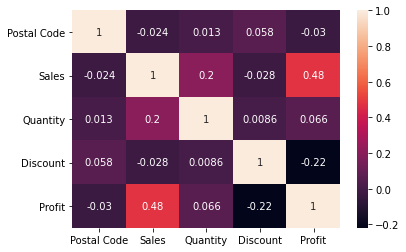

In [12]:
sns.heatmap(sample_store.corr(),annot=True)
plt.show()

In [13]:
columns=['Ship Mode', 'Segment', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit']
for column in columns:
    print(sample_store[column].value_counts())


Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64
Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64
New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
San Luis Obispo      1
Conroe               1
Littleton            1
Ontario              1
Lindenhurst          1
Name: City, Length: 531, dtype: int64
California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massac

In [14]:
sample_store.isnull().sum()   #There are no missing values in the given dataset

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [15]:
sample_store['Postal Code']=sample_store['Postal Code'].astype('object')

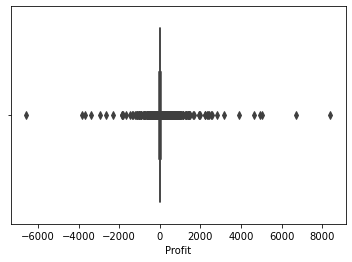

In [16]:
sns.boxplot(sample_store.Profit)  #As we can see there are a lot outliers in cloumns Profit and Sales
plt.show()

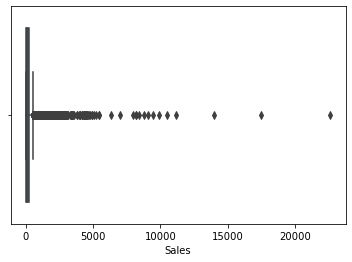

In [17]:
sns.boxplot(sample_store.Sales)
plt.show()

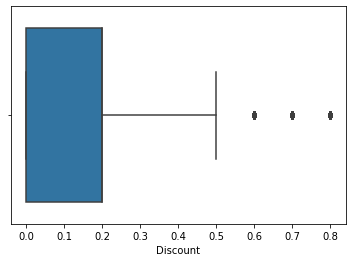

In [18]:
sns.boxplot(sample_store.Discount)
plt.show()

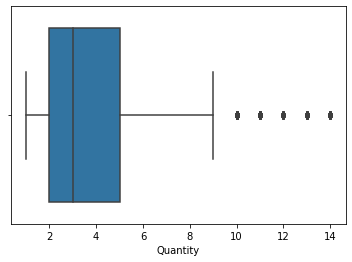

In [19]:
sns.boxplot(sample_store.Quantity)
plt.show()

In [20]:
np.quantile(sample_store.Discount,0.99) # As we can see that most of the discount of 99th percentile is concentrated between 2-8

0.8

In [21]:
np.quantile(sample_store.Quantity,0.99) #Most of the quantities are between 0-11 others are outliers but we cannot remove them

11.0

In [22]:
#Capping and Floring the values of Profit
c=np.quantile(sample_store.Profit,0.99)
sample_store=sample_store[sample_store['Profit']<c]
f=np.quantile(sample_store.Profit,0.01)
sample_store=sample_store[sample_store['Profit']>f]

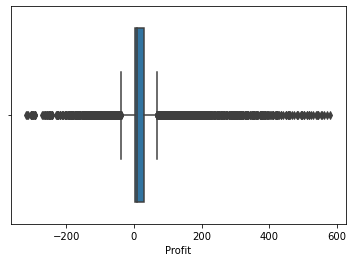

In [23]:
sns.boxplot(sample_store.Profit)
plt.show()

In [24]:
#Capping and Flooring the values of Sales
c_=np.quantile(sample_store.Sales,0.99)
sample_store=sample_store[sample_store['Sales']<c_]
f_=np.quantile(sample_store.Sales,0.01)
sample_store=sample_store[sample_store['Sales']>f_]


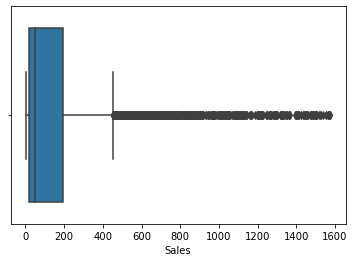

In [25]:
sns.boxplot(sample_store.Sales)
plt.show()

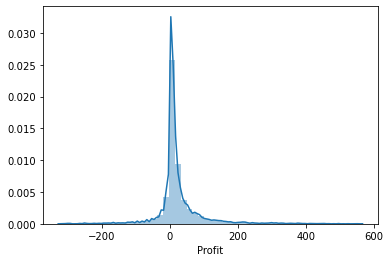

In [26]:
sns.distplot(sample_store['Profit'])
plt.show()

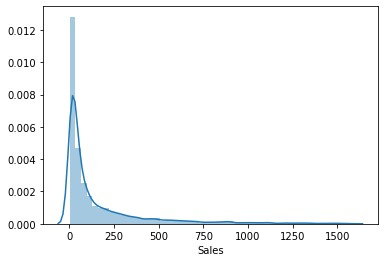

In [27]:
sns.distplot(sample_store['Sales'])
plt.show()

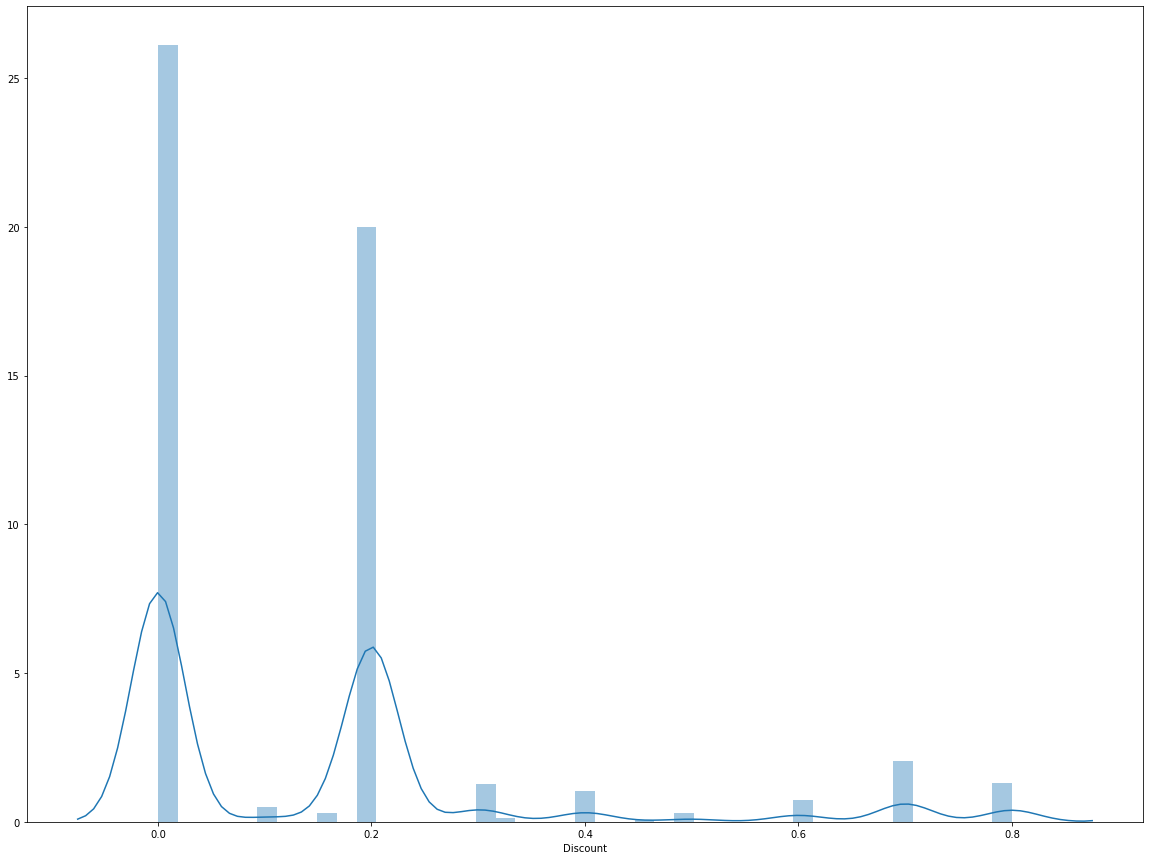

In [41]:
sns.distplot(sample_store['Discount'])
plt.show()

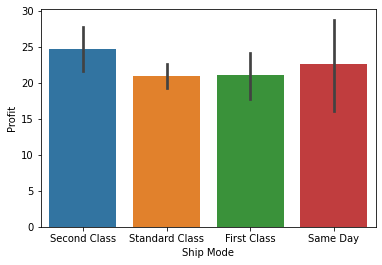

In [28]:
#Bivariate Analysis
sns.barplot(sample_store['Ship Mode'],sample_store['Profit'])
plt.show()

In [29]:
sample_store.groupby(by='Ship Mode').mean()['Profit']

Ship Mode
First Class       21.108402
Same Day          22.708352
Second Class      24.667148
Standard Class    20.968885
Name: Profit, dtype: float64

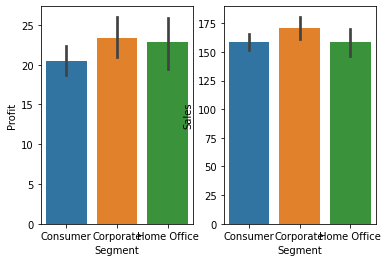

In [30]:
plt.subplot(1,2,1)
sns.barplot(sample_store["Segment"],sample_store["Profit"])
plt.subplot(1,2,2)
sns.barplot(sample_store['Segment'],sample_store['Sales'])
plt.show()

In [31]:
un=sample_store['City'].unique()

In [32]:
print(len(un))

526


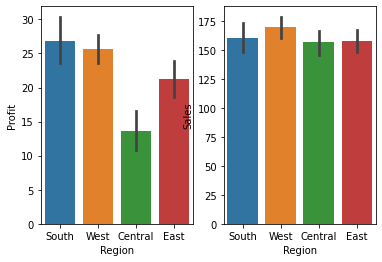

In [33]:
plt.subplot(1,2,1)
sns.barplot(sample_store["Region"],sample_store["Profit"])
plt.subplot(1,2,2)
sns.barplot(sample_store['Region'],sample_store['Sales'])
plt.show()

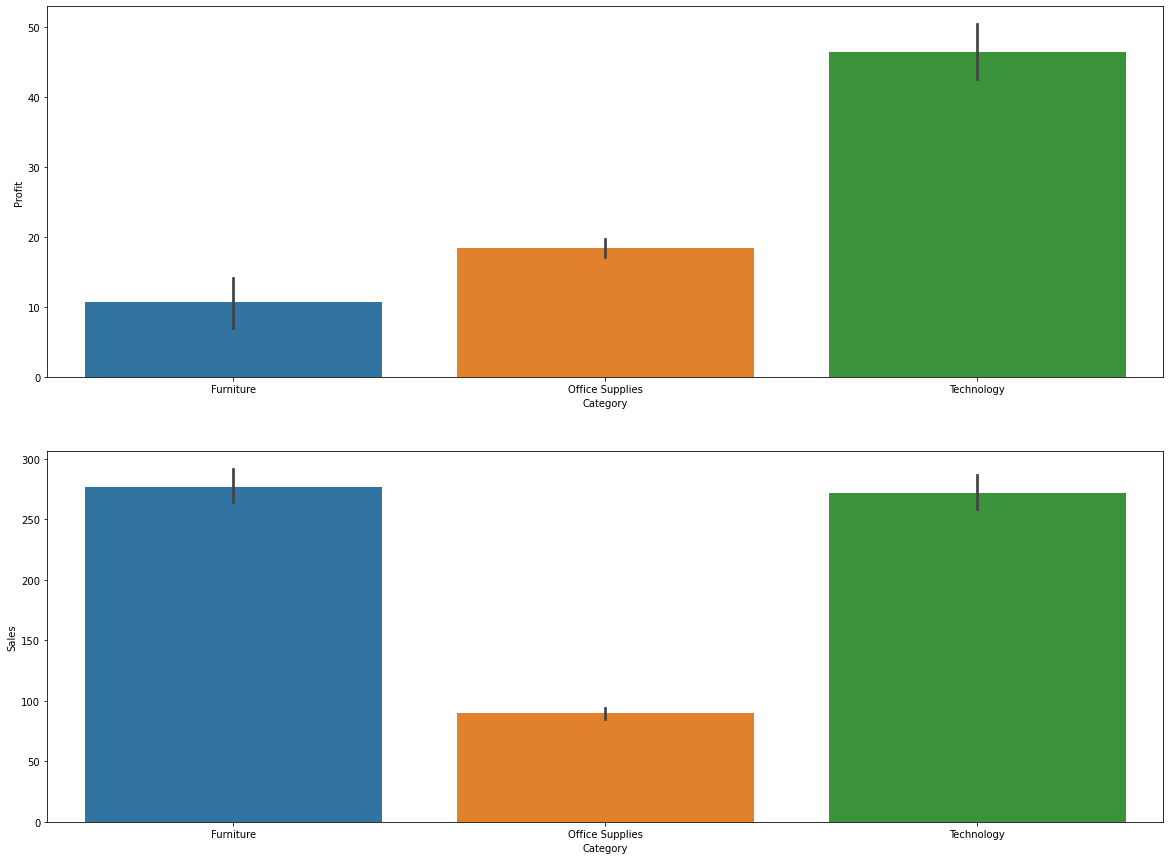

In [40]:
plt.subplot(2,1,1)
sns.barplot(sample_store["Category"],sample_store["Profit"])
plt.subplot(2,1,2)
sns.barplot(sample_store['Category'],sample_store['Sales'])
plt.show()

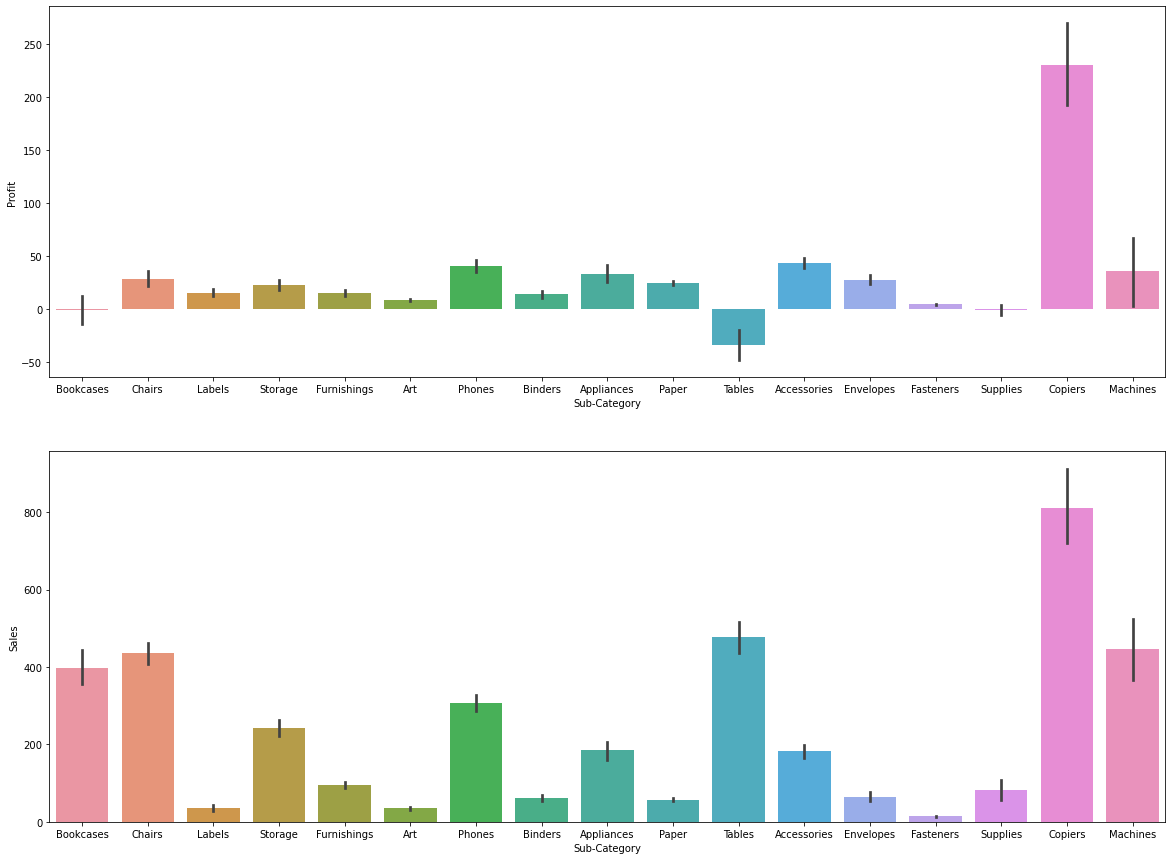

In [35]:
plt.rcParams["figure.figsize"]=(20,15)
plt.subplot(2,1,1)
sns.barplot(sample_store['Sub-Category'],sample_store['Profit'])
plt.subplot(2,1,2)
sns.barplot(sample_store['Sub-Category'],sample_store['Sales'])
plt.show()

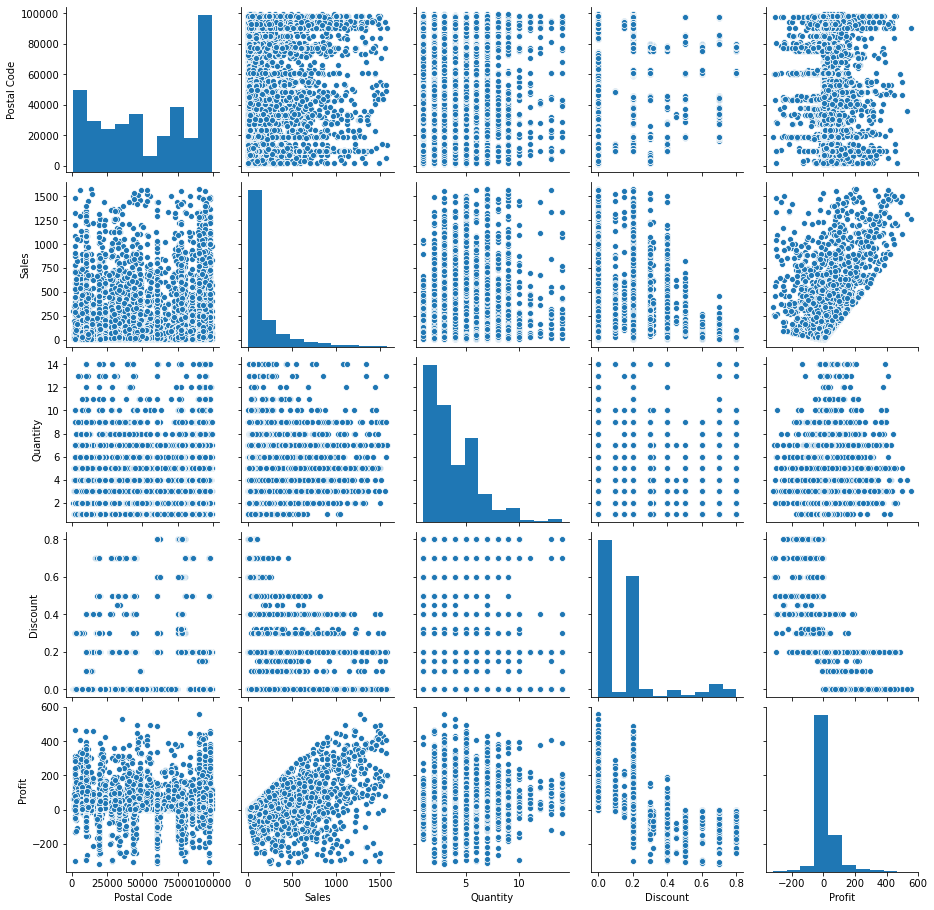

In [36]:
sns.pairplot(sample_store)
plt.show()

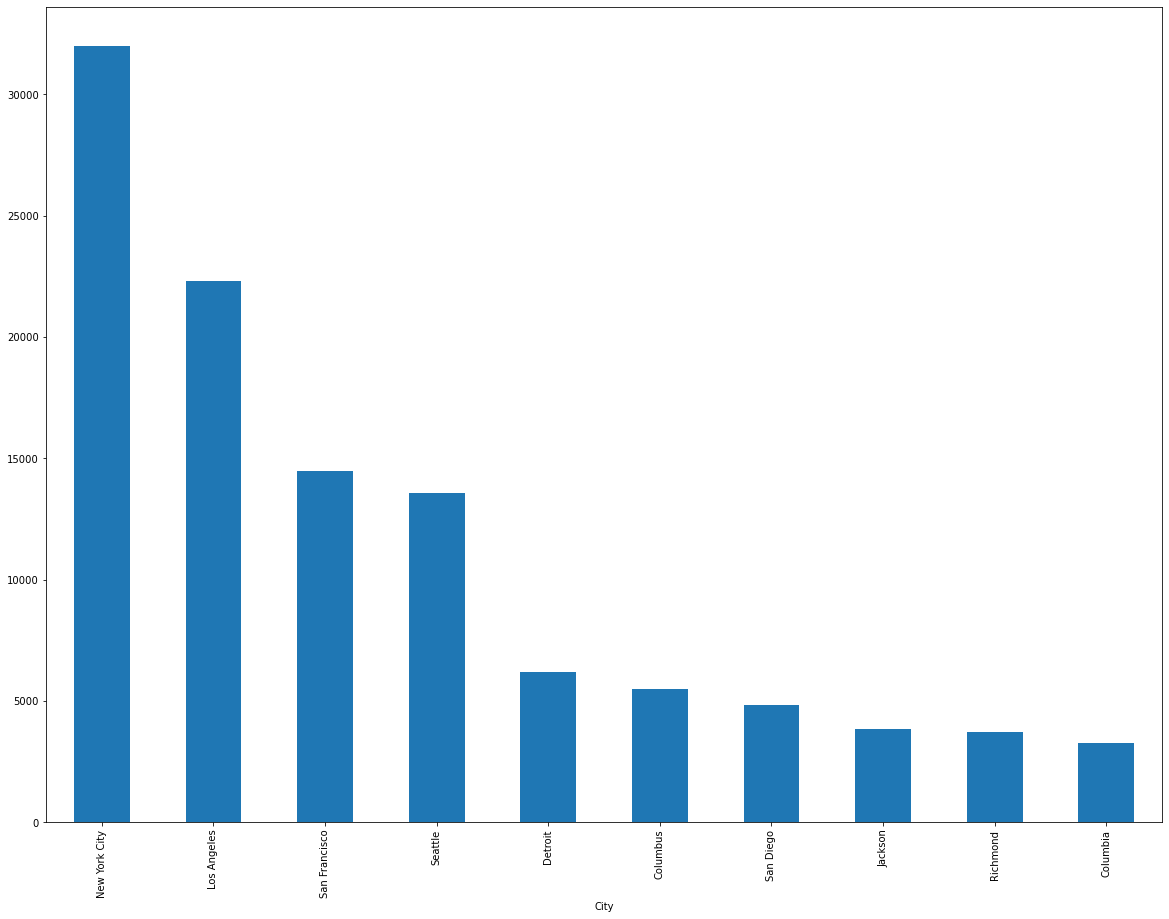

In [37]:
sample_store.groupby(by='City').sum()['Profit'].sort_values(ascending=False)[0:10].plot.bar()
plt.show()

In [38]:
pd.pivot_table(data=sample_store,index='Category',columns='Sub-Category',values='Profit',fill_value=0,aggfunc=sum)

Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Category,,,,,,,,,,,,,,,,,
Furniture,0.0000,0.0000,0.0000,0.0000,-224.3603,16555.5274,0.0000,0.0000,0.0000,14574.1064,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-9362.4453
Office Supplies,0.0000,14862.5698,6522.5022,19888.4882,0.0000,0.0000,0.0000,6962.6671,946.1117,0.0000,5545.5754,0.0000,34053.5693,0.0000,18635.9475,-77.2797,0.0000
Technology,32759.7392,0.0000,0.0000,0.0000,0.0000,0.0000,10125.7608,0.0000,0.0000,0.0000,0.0000,2576.7798,0.0000,34966.2091,0.0000,0.0000,0.0000


### Inferences from this EDA:
1) Profit and sales had a lot of outliers so capping and flooring was done on 0.01 and 0.99 percentile.

2) Quantity and discount have three and five outliers respectively but we retained them and did not drop them.

3)Most of the profit is from second class ship mode followed by same day ship mode.

4) Profit from corporate segemnt is slightly higher than the home office segment.

5)Most of the profit comes from south region followed by west,east and central.

6)Profits from the technology sector is highest.

7)Profit is negative from tables and bookcases although the sales are in the significant amount while profit is high for copiers

and machines and the sales are also high for them.

8)Most of the profit values are concentrated between 0-200 while most of the sales are between 0-250.

9) Highest profit is from the city Los Angeles,also high in New York City and lowest is from the city Philadelphia.
 
10) Furniture sals are high but it isnot transforming into profits so need to improve this area category.

11)Supplies profits are also low when sales are in a significant amount.

12)The discount is mostly zero and goes upto 0.8.

13)There are low sales and profits in art and fastners sub category.
